In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# splitting the training data into train and validation with the validation_split of 0.3
image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range=0.1,
                              height_shift_range =0.1,
                              rescale = 1/255,
                              shear_range =0.2,
                              zoom_range=0.2,
                              horizontal_flip=True, 
                              fill_mode = 'nearest',
                              validation_split = 0.3
                              )

In [15]:
train_data_dir ='Data for DL/Data/training'
validation_data_dir = 'Data for DL/Data/training'

In [16]:
# generating the train data using the image_gen defined above and the the data is specified as "training" in the function.
train_gen = image_gen.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    batch_size = 16,
    subset = 'training',
    class_mode = 'categorical')

Found 4126 images belonging to 6 classes.


In [17]:
#  generating the validation data using the image_gen defined above and the the data is specified as "validation" in the function.
validation_gen = image_gen.flow_from_directory(
    validation_data_dir,
    target_size=(150,150),
    batch_size = 16,
    subset = 'validation',
    class_mode = 'categorical')

Found 1765 images belonging to 6 classes.


In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Activation,Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
results1= model.fit_generator(train_gen, steps_per_epoch =375, epochs=10, validation_data= validation_gen, validation_steps =130)

Epoch 1/10
375/375 [==============================] - 1190s 3s/step - loss: 1.8972 - acc: 0.2095 - val_loss: 2.0070 - val_acc: 0.2034
Epoch 2/10
375/375 [==============================] - 1325s 4s/step - loss: 1.7841 - acc: 0.2190 - val_loss: 2.0032 - val_acc: 0.2000
Epoch 3/10
375/375 [==============================] - 2075s 6s/step - loss: 1.7820 - acc: 0.2200 - val_loss: 1.9822 - val_acc: 0.2113
Epoch 4/10
375/375 [==============================] - 1431s 4s/step - loss: 1.7815 - acc: 0.2182 - val_loss: 1.9931 - val_acc: 0.2074
Epoch 5/10
375/375 [==============================] - 1237s 3s/step - loss: 1.7812 - acc: 0.2200 - val_loss: 1.9642 - val_acc: 0.2181
Epoch 6/10
375/375 [==============================] - 1120s 3s/step - loss: 1.7809 - acc: 0.2215 - val_loss: 1.9752 - val_acc: 0.2142
Epoch 7/10
375/375 [==============================] - 1111s 3s/step - loss: 1.7809 - acc: 0.2200 - val_loss: 1.9709 - val_acc: 0.2187
Epoch 8/10
375/375 [==============================] - 1153s 3s

In [26]:
import matplotlib.pyplot as plt

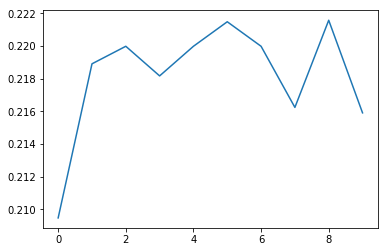

In [29]:
plt.plot(results1.history['acc'])

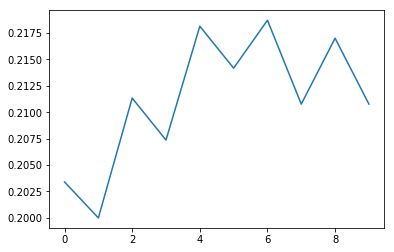

In [38]:
plt.plot(results1.history['val_acc'])

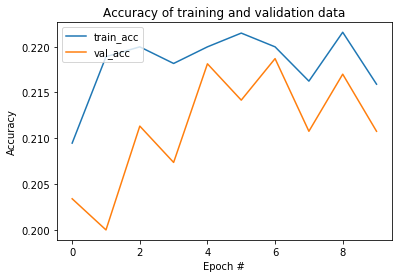

In [39]:
plt.figure()
plt.plot(np.arange(0, 10), results1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), results1.history["val_acc"], label="val_acc")
plt.title("Accuracy of training and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

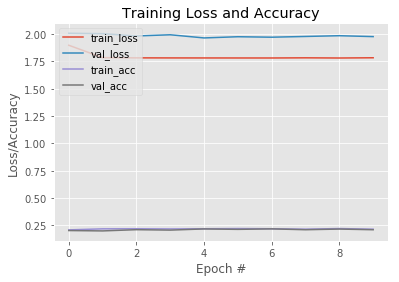

In [40]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), results1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), results1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), results1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), results1.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [41]:
test_data_dir ='Data for DL/Data/testing'

In [42]:
import numpy as np

In [44]:
desired_batch_size=16

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=desired_batch_size)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = 
                                   np.ceil(nb_samples/desired_batch_size))

Found 2546 images belonging to 6 classes.


In [45]:
predict[0]

array([0.1386087 , 0.31700984, 0.17404738, 0.11345492, 0.1130134 ,
       0.14386576], dtype=float32)

In [46]:
def convert_to_class(y_one_hot, dtype=int):
    """ Converts a one-hot class encoding (array with as many positions as total
        classes, with 1 in the corresponding class position, 0 in the other positions),
        or soft-max class encoding (array with as many positions as total
        classes, whose largest valued position is used as class membership)
        to an integer class encoding.

        Parameters
        ----------
        y_one_hot : numpy array
            Input array with one-hot or soft-max class encoding.
        dtype : data type
            Data type to use for the output numpy array.
            (Default: int, integer data is used to represent the
            class membership).

        Return
        ----------
        Returns a numpy array with an integer class encoding.
    """

    maxi = lambda a: a.argmax()
    iter_to_na = lambda i: np.fromiter(i, dtype=dtype)
    return np.array([maxi(a) for a in y_one_hot])


In [48]:
actual = test_generator.classes
predicted_classes = convert_to_class(predict)

In [49]:
actual

array([0, 0, 0, ..., 5, 5, 5])

In [50]:
predicted_classes

array([1, 1, 2, ..., 2, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(actual, predicted_classes) 

array([[ 27, 307,  27,   4,  15,  19],
       [ 56, 432,  43,   4,  17,   8],
       [ 31, 254,  74,  11,  10,  35],
       [ 63, 282,  33,   6,   4,   9],
       [ 46, 317,  45,   2,   7,   6],
       [ 62, 262,  14,   4,   6,   4]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(actual, predicted_classes))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08       399
           1       0.23      0.77      0.36       560
           2       0.31      0.18      0.23       415
           3       0.19      0.02      0.03       397
           4       0.12      0.02      0.03       423
           5       0.05      0.01      0.02       352

    accuracy                           0.22      2546
   macro avg       0.17      0.18      0.12      2546
weighted avg       0.17      0.22      0.14      2546



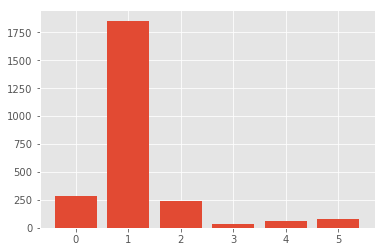

In [56]:
labels, counts = np.unique( predicted_classes, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [3]:
# the performance of the model is poor as we can see the plot.